# Cosa faremo

### Una banca si accorge di perdere molto denaro nei prestiti di piccola entità!!!
### Il vostro lavoro, in quanto consulenti, sarà quello di:
- sviluppare una pagina web per la richiesta di nuovi prestiti
- sviluppare un'analisi per capire quali prestiti sono rischiosi e quali no
- applicare questa analisi in modo che le richieste vengano filtrate a priori

# Cosa abbiamo a disposizione

## file csv con i prestiti di piccola taglia degli ultimi due anni

# Tipico Workflow di ML

1. Acquisizione Dati
2. Pulizia Dati
3. Esplorazione Visiva
4. Trasformazione (eventuale) e Scelta del Modello
5. Misurazione delle performance del Modello

# Con l'aggiunta di:

6. Deploying del Modello as a service
7. Collegamento dell'API alla Web Application

# Acquisizione Dati

In [1]:
import pandas as pd

df = pd.read_csv("storico_prestiti.csv")
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


# Pulizia dei Dati

# Di che tipi sono i dati presenti nel DataFrame?

In [2]:
df.dtypes

default        int64
amount         int64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

# Quanti dati ho?

In [3]:
print("Shape: {}".format(df.shape))
print("Colonne: {}".format(df.columns))

Shape: (7727, 7)
Colonne: Index(['default', 'amount', 'grade', 'years', 'ownership', 'income', 'age'], dtype='object')


In [4]:
df.describe()

,default,amount,years,income,age
count,7727.000000,7727.000000,7448.000000,7.727000e+03,7727.000000
mean,0.478452,9453.345412,6.086332,6.337197e+04,27.542125
std,0.499568,6298.595800,6.700758,4.687195e+04,6.132121
min,0.000000,500.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,7.679650e+04,30.000000
max,1.000000,35000.000000,62.000000,1.200000e+06,94.000000


# Come verifico se ho dei valori nulli?

In [5]:
df.isnull().head()

,default,amount,grade,years,ownership,income,age
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


# Come verifico se ho dei valori nulli?

In [6]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

# Cosa faccio con queste righe?

1. Elimino le righe (279 su 7727)
2. Sostituisco con un valore soglia (es. 9999 -> Errore nell'importazione)
3. Sostituisco applicando una funzione (random tra le altre righe, media, valore stimato da un altro modello)

# Scelgo la 3 (e uso la media aritmetica)

In [7]:
import numpy as np

df.years = df.years.fillna(np.mean(df.years))

# GRAFICI
### (Data Visualization)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Univariate Analysis
## grafici riferiti all'output o a una singola feature
### feature = una colonna del dataset che non sia "default"

### Prestiti andati a buon fine o meno

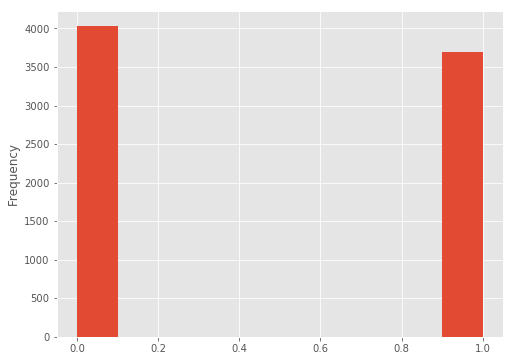

In [9]:
df.default.plot.hist()

#### Grafico dei livelli di solvibilità del cliente

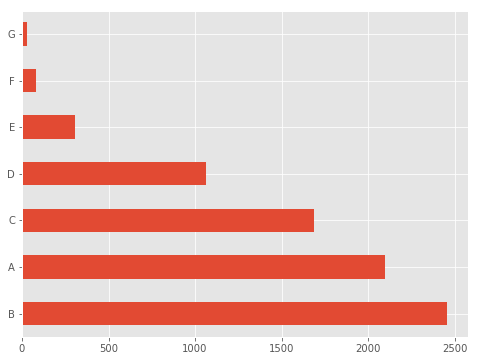

In [10]:
df.grade.value_counts().plot.barh()

### Età dei richiedenti

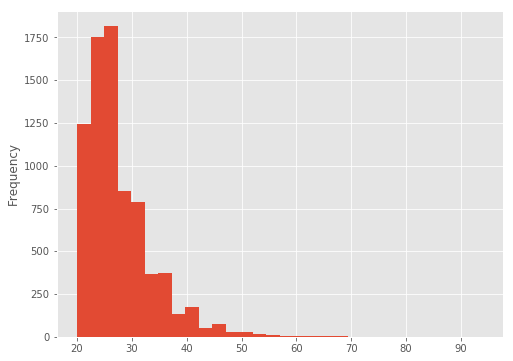

In [11]:
df.age.plot.hist(bins=30)

## Analisi Multivariabile
### Grafici a due e più variabili

#### Grafico età-disponibilità economica

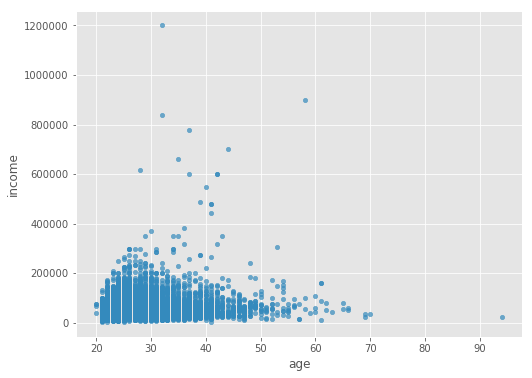

In [12]:
df.plot.scatter(x='age', y='income', alpha=0.7)

### Relazione tra età, disponibilità economica e default del prestito

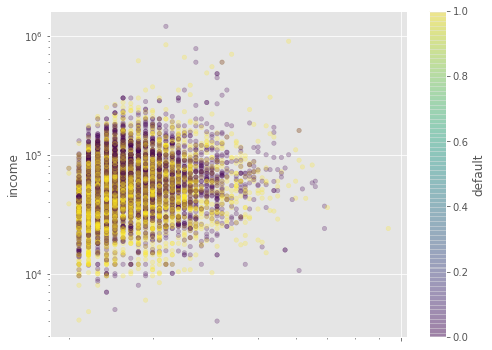

In [13]:
df.plot.scatter(x='age', y='income', c='default', logx=True, logy=True, alpha=0.25, cmap='viridis')

# Trasformazione dei valori non numerici

In [14]:
df.describe(include='all')

,default,amount,grade,years,ownership,income,age
count,7727.00,7727.00,7727,7727.00,7727,7727.00,7727.00
unique,nan,nan,7,nan,4,nan,nan
top,nan,nan,B,nan,RENT,nan,nan
freq,nan,nan,2456,nan,4054,nan,nan
mean,0.48,9453.35,NaN,6.09,NaN,63371.97,27.54
std,0.50,6298.60,NaN,6.58,NaN,46871.95,6.13
min,0.00,500.00,NaN,0.00,NaN,4000.00,20.00
25%,0.00,5000.00,NaN,2.00,NaN,37000.00,23.00
50%,0.00,8000.00,NaN,4.00,NaN,54000.00,26.00
75%,1.00,12000.00,NaN,8.00,NaN,76796.50,30.00


In [15]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le_grade = LabelEncoder().fit(df_encoded["grade"])
df_encoded.grade = le_grade.transform(df_encoded.grade)

le_ownership = LabelEncoder().fit(df["ownership"])
df_encoded.ownership = le_ownership.transform(df_encoded.ownership)

In [16]:
df_encoded.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,1,2.00,3,19200.00,24
1,1,6500,0,2.00,0,66000.00,28
2,0,2400,0,2.00,3,60000.00,36
3,0,10000,2,3.00,3,62000.00,24
4,1,4000,2,2.00,3,20000.00,28


# Modello

### Apprendimento Supervisionato vs Apprendimento non Supervisionato

1. Regressione Lineare 
2. Classificatori Bayesiani 
3. Reti Neurali Artificiali 
4. Alberi Decisionali e Foreste

5. Clustering
6. PCA e vari (dimensionality reduction)
7. Apriori

# Alberi Decisionali

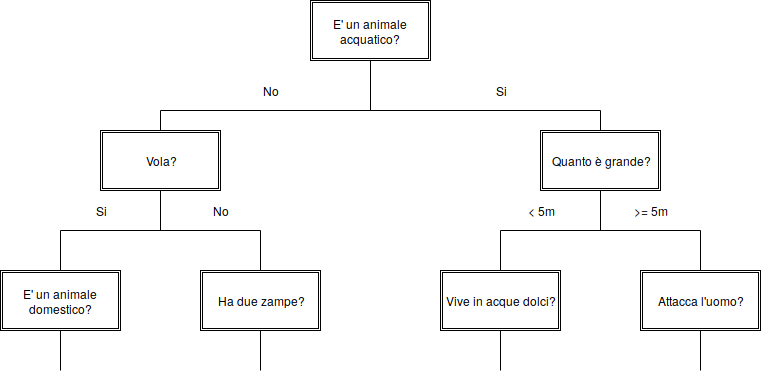

In [17]:
from IPython.display import Image
Image("img/decisionanimals.png")

## Utilizzo
- previsione di variabili continue che categoriche

## Fine
- scrivere un programma in grado di costruire una serie di "domande" a partire dai dati di storico

### Proviamo a creare un albero usando solo due variabili e con profondità = 2

In [18]:
X_2 = df_encoded.loc[:,('age', 'amount')]
y = df_encoded.loc[:,'default']

from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(max_depth=2)

clf_dt = clf_dt.fit(X_2, y)

In [19]:
import pydotplus 
dot_data = tree.export_graphviz(clf_dt, out_file='tree_3.dot', feature_names=X_2.columns,
                                class_names=['no', 'yes'], filled=True, 
                                rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_file('tree_3.dot')

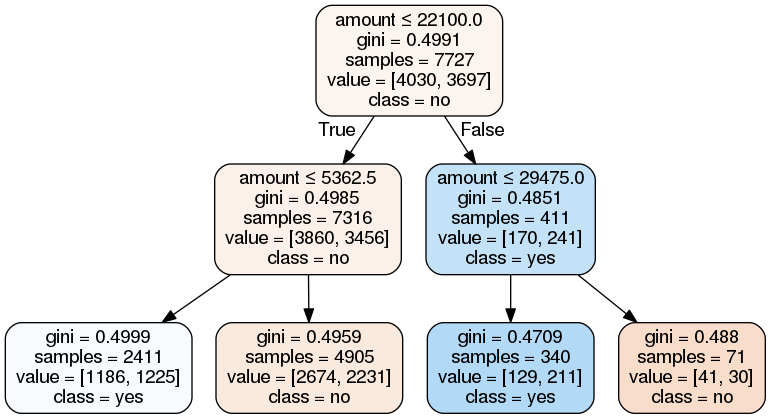

In [20]:
Image(graph.create_png())

In [21]:
def plot_boundaries(X2, clf):
    x_min, x_max = X2.iloc[:, 0].min() - 1, X2.iloc[:, 0].max() + 1
    y_min, y_max = X2.iloc[:, 1].min() - 1, X2.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/100), 
                         np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    target = clf.predict(X2)
    plt.scatter(x = X2.iloc[:,0], y = X2.iloc[:,1], c = y, s = 20, cmap=plt.cm.magma)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.4)

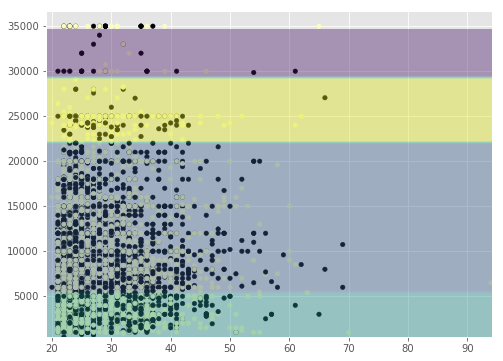

In [22]:
plot_boundaries(X_2, clf_dt)

### Proviamo a costruirne uno con profondità 6

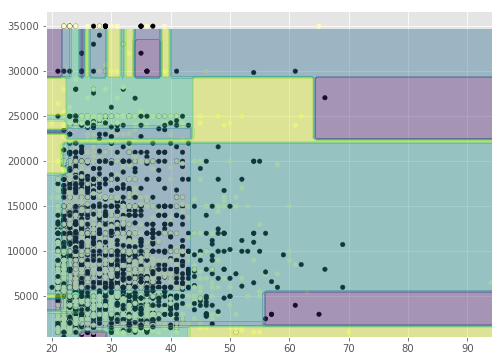

In [23]:
clf_dt_5 = tree.DecisionTreeClassifier(max_depth=6).fit(X_2,y)
plot_boundaries(X_2, clf_dt_5)

# Links

- https://github.com/amitkaps/full-stack-data-science (Repo originale del workshop)

- https://github.com/alessandrocucci/mlaas (Repo di queste slides)

### Q&A Slide